## Assignment 8
## Shovan Biswas: Team (Shovan Biswas, Randy Thompson, Benjamin Horvath)

## Short description of the database

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/, from which we selected Lewis Carroll's _Alice in the Wonderland_. We begin by getting the Python interpreter to load the NLTK package, then use nltk.corpus.gutenberg.words(), to load the words:  

In [3]:
#Packages  

from collections import Counter
import matplotlib.pyplot as plt
import nltk as nltk
import string
import pandas as pd

First, load the selected corpus, which is Lewis Carroll's _Alice in Wonderland_. The text is already tokenized, but it seems like there are artifacts from the Gutenberg Project remaining:

In [2]:
carroll = nltk.corpus.gutenberg.words('carroll-alice.txt')
carroll[0:20]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'Hole']

## Number of unique tokens

To get the number of unique words in the corpus, we will have to filter out the puncuation tokens and handle capital letters. A simple list comprehension combined with the `string` package's list of punctuation should be sufficient. (We'll also need to get rid of orphaned es's and tee's and blanks.) From there, it's easy to find the number of unique words in the text by converting the list to a set and getting its size:

In [3]:
carroll_uniq = [token.strip(string.punctuation).lower() for token in carroll]
carroll_uniq = [token for token in carroll_uniq if token not in ['', 's', 't']]

carroll_uniq[0:99]

['alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 '1865',
 'chapter',
 'i',
 'down',
 'the',
 'rabbit',
 'hole',
 'alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 'thought',
 'alice',
 'without',
 'pictures',
 'or',
 'conversation',
 'so',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 'as',
 'well',
 'as',
 'she',
 'could',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 'whether',
 'the',
 'pleasure',
 'of']

Thus the numbers of tokens and unique tokens are:

In [4]:
len(set(carroll_uniq))

2568

In [5]:
len(carroll_uniq)

26917

## How many unique words make up half of the corpus?

To answer this we have to first count the frequency of each token. This is pretty easy with Python's built-in `Counter` object:

In [6]:
token_counts = Counter(carroll_uniq)
token_counts

Counter({'alice': 398,
         'adventures': 7,
         'in': 369,
         'wonderland': 3,
         'by': 59,
         'lewis': 1,
         'carroll': 1,
         '1865': 1,
         'chapter': 12,
         'i': 545,
         'down': 102,
         'the': 1642,
         'rabbit': 51,
         'hole': 5,
         'was': 357,
         'beginning': 14,
         'to': 729,
         'get': 46,
         'very': 144,
         'tired': 7,
         'of': 514,
         'sitting': 10,
         'her': 248,
         'sister': 9,
         'on': 193,
         'bank': 3,
         'and': 872,
         'having': 10,
         'nothing': 34,
         'do': 81,
         'once': 34,
         'or': 77,
         'twice': 5,
         'she': 553,
         'had': 178,
         'peeped': 3,
         'into': 67,
         'book': 11,
         'reading': 3,
         'but': 170,
         'it': 595,
         'no': 90,
         'pictures': 4,
         'conversations': 1,
         'what': 141,
         'is': 108,
   

For the rest, I convert the `Counter` output into a Pandas dataframe:

In [10]:
data = zip(token_counts.keys(), token_counts.values())
df = pd.DataFrame(data, columns = ['word', 'n']) \
       .sort_values(by='n', ascending=False) \
       .reset_index()
df.head()

,index,word,n
0,11,the,1642
1,26,and,872
2,16,to,729
3,47,a,632
4,40,it,595


We know from above there are 26,917 total tokens. So we'll set a cumulative sum on the dataframe and find the closest point to 27,135 / 2 = 13,458:

In [11]:
df['cumsum'] = df.n.cumsum()
df.query('cumsum >= 13400 and cumsum <= 13500')

,index,word,n,cumsum
53,78,when,79,13459


By the index, we see that the 53 most frequent tokens make up half of the total corpus length.

## Top 200 most frequent tokens

Easy to get from the dataframe:

In [12]:
df.word.head(200).tolist()

['the',
 'and',
 'to',
 'a',
 'it',
 'she',
 'i',
 'of',
 'said',
 'you',
 'alice',
 'in',
 'was',
 'that',
 'as',
 'her',
 'at',
 'on',
 'all',
 'with',
 'had',
 'but',
 'for',
 'they',
 'so',
 'be',
 'not',
 'very',
 'what',
 'this',
 'little',
 'he',
 'out',
 'is',
 'one',
 'down',
 'up',
 'there',
 'if',
 'his',
 'about',
 'then',
 'no',
 'them',
 'know',
 'were',
 'like',
 'would',
 'again',
 'went',
 'herself',
 'do',
 'have',
 'when',
 'or',
 'could',
 'queen',
 'thought',
 'off',
 'time',
 'how',
 'me',
 'see',
 'into',
 'king',
 'm',
 'did',
 'well',
 'who',
 'can',
 'your',
 'don',
 'now',
 'turtle',
 'by',
 'began',
 'my',
 'its',
 'll',
 'an',
 'mock',
 'way',
 'hatter',
 'quite',
 'gryphon',
 'are',
 'think',
 'their',
 'just',
 'much',
 'here',
 'rabbit',
 'some',
 'first',
 'say',
 'only',
 'go',
 'head',
 'more',
 'thing',
 'which',
 'never',
 'voice',
 'get',
 'come',
 'looked',
 'got',
 'oh',
 'must',
 've',
 'mouse',
 'after',
 'him',
 'duchess',
 'such',
 'round',
 

## Plot of top 200 words' frequencies

This observed frequency does appear to approximate Zipf's law pretty closely:

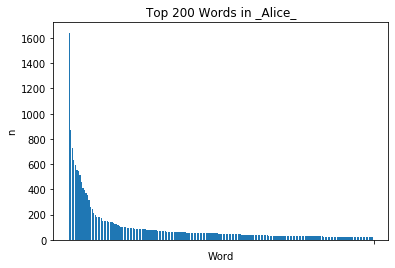

In [13]:
plt.bar(df.word.head(200).tolist(),
        df.n.head(200).tolist())
plt.xlabel('Word')
plt.ylabel('n')
plt.title('Top 200 Words in _Alice_')

plt.xticks('', '')

plt.show()

## Difference of _Alice_ corpa from all corpus of all words

From above the top five words in _Alice_ are 'the', 'and', 'to', 'a', 'it'. This is probably similar to all English-language documents above a certain length. 

The next most frequent word is 'she', which reflects that the protagonist of this story is female. Other types of texts probably do not have 'she' ranking so highly. Similarly with the token of her name, 'Alice'.

'Queen' and 'king' are also very high, as the names of characters in the text.